In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import math
from matplotlib.ticker import MaxNLocator
import csv
import folium
from folium.plugins import FastMarkerCluster

In [2]:
patient= pd.read_csv(r"C:\Users\Tatiksha\Documents\Customer Social Analytics\Final Project\patient_new.csv", encoding= 'utf8')
patient.head()

,id,sex,birth_year,country,region,disease,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state
0,1,female,1984.0,China,filtered at airport,NaN,NaN,visit to Wuhan,1.0,NaN,45.0,2020-01-20,2020-02-06,NaN,released
1,2,male,1964.0,Korea,filtered at airport,NaN,NaN,visit to Wuhan,1.0,NaN,75.0,2020-01-24,2020-02-05,NaN,released
2,3,male,1966.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaN,released
3,4,male,1964.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,95.0,2020-01-27,2020-02-09,NaN,released
4,5,male,1987.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,31.0,2020-01-30,2020-03-02,NaN,released


In [3]:
route= pd.read_csv(r"C:\Users\Tatiksha\Documents\Customer Social Analytics\Final Project\route_new.csv", encoding= 'utf8')
route.head()

,id,date,province,city,visit,latitude,longitude,order
0,1,1/19/2020,Incheon,Jung-gu,airport,37.460459,126.440680,1
1,1,1/20/2020,Incheon,Seo-gu,hospital_isolated,37.478832,126.668558,2
2,2,1/22/2020,Gyeonggi-do,Gimpo-si,airport,37.562143,126.801884,1
3,2,1/23/2020,Seoul,Jung-gu,hospital_isolated,37.567454,127.005627,2
4,3,1/20/2020,Incheon,Jung-gu,airport,37.460459,126.440680,1


In [4]:
time= pd.read_csv(r"C:\Users\Tatiksha\Documents\Customer Social Analytics\Final Project\time.csv", encoding= 'utf8')
time.head()

,date,acc_test,acc_negative,acc_confirmed,acc_released,acc_deceased,new_test,new_negative,new_confirmed,new_released,new_deceased
0,2020-01-20,1,0,1,0,0,1,0,1,0,0
1,2020-01-21,1,0,1,0,0,0,0,0,0,0
2,2020-01-22,4,3,1,0,0,3,3,0,0,0
3,2020-01-23,22,21,1,0,0,18,18,0,0,0
4,2020-01-24,27,25,2,0,0,5,4,1,0,0


In [5]:
lats = route['latitude'].tolist()
lons = route['longitude'].tolist()
locations = list(zip(lats, lons))



map1 = folium.Map(location=[37.52, 126.99])
FastMarkerCluster(data=locations).add_to(map1)
map1

In [6]:
import plotly as py
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True) 

In [7]:
df= pd.read_csv(r"C:\Users\Tatiksha\Documents\Customer Social Analytics\Final Project\covid_19_data.csv", encoding= 'utf8')
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [8]:
df = df.rename(columns={'Country/Region':'Country'})
df = df.rename(columns={'ObservationDate':'Date'})
df.head()

,SNo,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [9]:
df_countrydate = df[df['Confirmed']>0]
df_countrydate = df_countrydate.groupby(['Date','Country']).sum().reset_index()
df_countrydate.head()

,Date,Country,SNo,Confirmed,Deaths,Recovered
0,01/22/2020,Japan,36,2.0,0.0,0.0
1,01/22/2020,Macau,21,1.0,0.0,0.0
2,01/22/2020,Mainland China,373,547.0,17.0,28.0
3,01/22/2020,South Korea,38,1.0,0.0,0.0
4,01/22/2020,Taiwan,29,1.0,0.0,0.0


In [10]:
fig = px.choropleth(df_countrydate, 
                    locations="Country", 
                    locationmode = "country names",
                    color="Confirmed", 
                    hover_name="Country", 
                    animation_frame="Date"
                   )

fig.update_layout(
    title_text = 'Spread of Coronavirus over time',
    title_x = 0.5,
    geo=dict(
        showframe = True,
        showcoastlines = False,
    ))
    
fig.show()

In [11]:
#R studio https://www.data-to-viz.com/story/MapConnection.html
#https://www.geeksforgeeks.org/python-plotting-google-map-using-gmplot-package/
#https://plot.ly/python/lines-on-maps/


([<matplotlib.axis.XTick at 0x2e3e6e13630>,
 <a list of 2 Text xticklabel objects>)

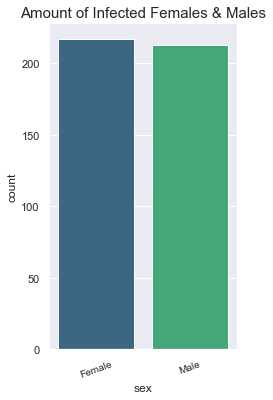

In [12]:
sns.set(color_codes=True)
sns.countplot(patient['sex'], palette="viridis")
sick = plt.gcf()
sick.set_size_inches(3,6)
plt.title('Amount of Infected Females & Males', fontsize='15')
plt.xticks(rotation='vertical',fontsize='10')
#plt.xticks(np.arange(0, 1, step=0.2))  # Set label locations
plt.xticks(np.arange(2), ['Female', 'Male'])  # Set text labels
plt.xticks([0, 1], ['Female', 'Male'], rotation=20)  # Set text labels and properties
#plt.savefig('infected.png')

- Out of 7135 observations, there were many missing rows showing females/males
- Nevertheless, we can still see a sample of those who got infected by the virus
- Overall, there were 217 Females and 213 males who got sick 

- Next we'll see the breakdown of the current state --> whether the person is still isolated (in quarantine), released (stable condition), or deceased (passed away) compared to Age and Gender.
- We will also test a hypothesis that those older than 60 years have a higher rate of death than those people who are younger

In [13]:
states = pd.DataFrame(patient["state"].value_counts())
states["status"] = states.index
states.rename(columns={"state": "count"}, inplace=True)

fig = px.pie(states,
             values="count",
             names="status",
             title="Current state of patients",
             template="seaborn",
             color= "status",
             color_discrete_map={'isolated':'lightcyan', 
                                 'released':'royalblue', 
                                 'deceased':'red'})
                                            
fig.update_traces(rotation=90, pull=0.05, textinfo="value+percent+label")
fig.show()

- The majority of patients are currently isolated with 55 released and even fewer who are deceased (31)
- Next we'll compare State based on Sex

In [15]:
#creating a new column called Age 
patient['age'] = 2020-patient['birth_year']
patient.head()

,id,sex,birth_year,country,region,disease,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state,age
0,1,female,1984.0,China,filtered at airport,NaN,NaN,visit to Wuhan,1.0,NaN,45.0,2020-01-20,2020-02-06,NaN,released,36.0
1,2,male,1964.0,Korea,filtered at airport,NaN,NaN,visit to Wuhan,1.0,NaN,75.0,2020-01-24,2020-02-05,NaN,released,56.0
2,3,male,1966.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaN,released,54.0
3,4,male,1964.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,95.0,2020-01-27,2020-02-09,NaN,released,56.0
4,5,male,1987.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,31.0,2020-01-30,2020-03-02,NaN,released,33.0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]), <a list of 24 Text xticklabel objects>)

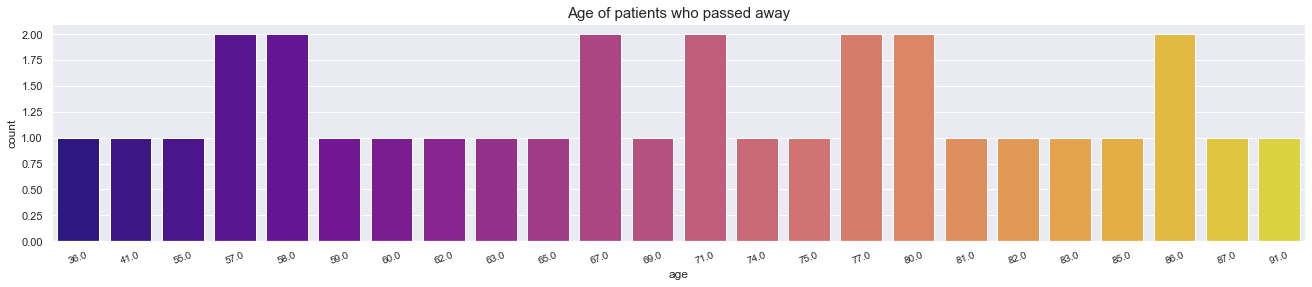

In [23]:
#filtering for patients who passed away
Dead= patient[patient['state']=='deceased']

sns.countplot(Dead['age'], palette="plasma")
sick = plt.gcf()
sick.set_size_inches(20,4)
plt.title('Age of patients who passed away', fontsize='15')
plt.xticks(rotation='vertical',fontsize='10')
plt.xticks(rotation=20) 

([<matplotlib.axis.XTick at 0x2e3e8917d30>,
 <a list of 3 Text xticklabel objects>)

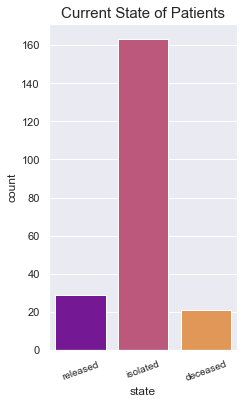

In [16]:
#filtering for male
Male= patient[patient['sex']=='male']

sns.countplot(Male['state'], palette="plasma")
sick = plt.gcf()
sick.set_size_inches(3,6)
plt.title('Current State of Patients', fontsize='15')
plt.xticks(rotation='vertical',fontsize='10')
plt.xticks(np.arange(3), rotation=20) 

([<matplotlib.axis.XTick at 0x2e3e1abd7b8>,
 <a list of 3 Text xticklabel objects>)

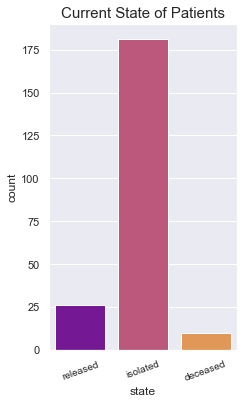

In [17]:
#filtering for females
Female= patient[patient['sex']=='female']

sns.countplot(Female['state'], palette="plasma")
sick = plt.gcf()
sick.set_size_inches(3,6)
plt.title('Current State of Patients', fontsize='15')
plt.xticks(rotation='vertical',fontsize='10')
plt.xticks(np.arange(3), rotation=20) 

- There seems to be similar distribution of those who have been released and isolated for Males and Females
- However, there are more males who have passed away than Females
- It is important to note that this was only a small sample out of the whole dataset
    - there are many unaccounted patients that have missing values for Sex, Birth Year, Region, Group, Reason of Infection, etc.
    

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64]),
 <a list of 65 Text xticklabel objects>)

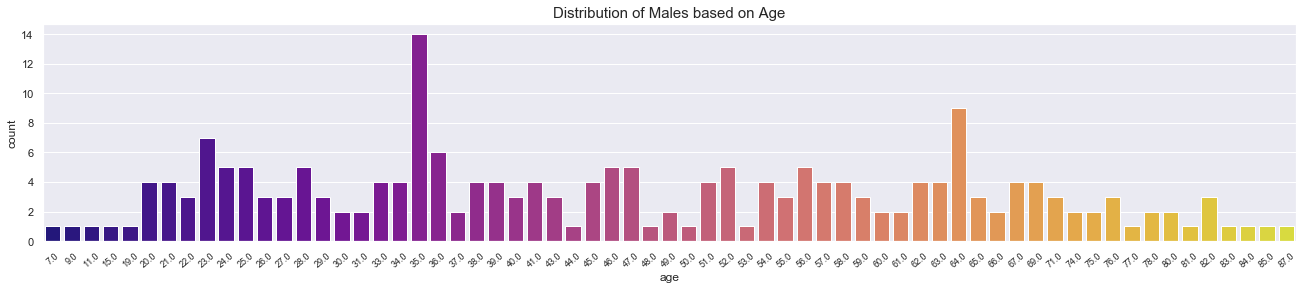

In [14]:
sns.countplot(Male['age'], palette="plasma")
sick = plt.gcf()
sick.set_size_inches(20,4)
plt.title('Distribution of Males based on Age', fontsize='15')
plt.xticks(rotation='vertical',fontsize='9')
plt.xticks(rotation=40) 

- The youngest male to get sick was 7 with the oldest being 87
- The majority of people who got infected were 35 years old followed by those who were 64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67]),
 <a list of 68 Text xticklabel objects>)

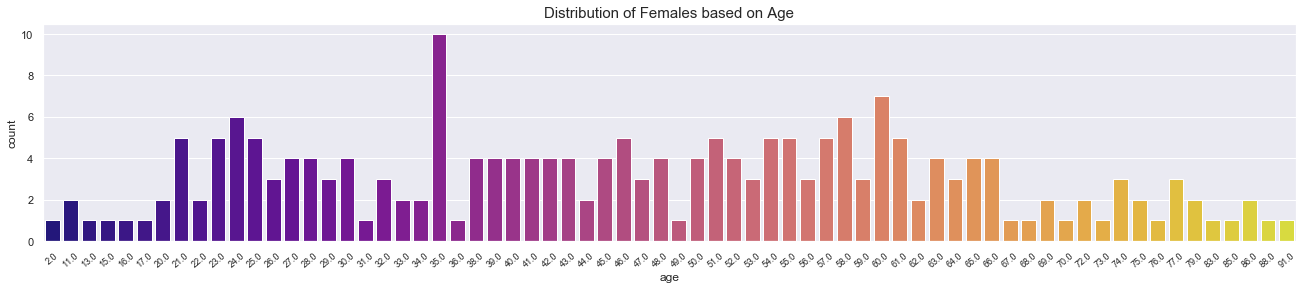

In [15]:
sns.countplot(Female['age'], palette="plasma")
sick = plt.gcf()
sick.set_size_inches(20,4)
plt.title('Distribution of Females based on Age', fontsize='15')
plt.xticks(rotation='vertical',fontsize='9')
plt.xticks(rotation=40) 

- There is a lot of variability for Females in terms of age compared to males
- The youngest person was aged 2 with the oldest being 91 - a much wider range than males
- However similar to Males, the majority of females aged 35 and 60 were infected the most

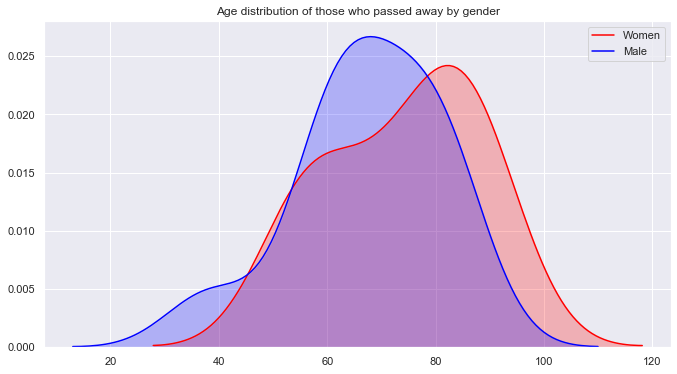

In [38]:
male_dead= Male[Male['state']=='deceased']
female_dead= Female[Female['state']=='deceased']

plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
plt.title("Age distribution of those who passed away by gender")
sns.kdeplot(data=female_dead['age'], label="Women", shade=True, color="Red")
sns.kdeplot(data=male_dead['age'],label="Male" ,shade=True, color="Blue")

In [30]:
female_dead.describe()

,id,birth_year,disease,infection_order,infected_by,contact_number,age
count,10.000000,10.000000,7.0,0.0,0.0,0.0,10.000000
mean,2461.500000,1945.900000,1.0,NaN,NaN,NaN,74.100000
std,2258.187338,13.527339,0.0,NaN,NaN,NaN,13.527339
min,38.000000,1929.000000,1.0,NaN,NaN,NaN,55.000000
25%,907.000000,1934.250000,1.0,NaN,NaN,NaN,60.750000
50%,1839.000000,1943.000000,1.0,NaN,NaN,NaN,77.000000
75%,3726.750000,1959.250000,1.0,NaN,NaN,NaN,85.750000
max,6285.000000,1965.000000,1.0,NaN,NaN,NaN,91.000000


In [31]:
male_dead.describe()

,id,birth_year,disease,infection_order,infected_by,contact_number,age
count,21.000000,21.000000,19.0,0.0,0.0,0.0,21.000000
mean,1707.857143,1952.428571,1.0,NaN,NaN,NaN,67.571429
std,1900.102768,13.283717,0.0,NaN,NaN,NaN,13.283717
min,54.000000,1933.000000,1.0,NaN,NaN,NaN,36.000000
25%,286.000000,1940.000000,1.0,NaN,NaN,NaN,60.000000
50%,875.000000,1953.000000,1.0,NaN,NaN,NaN,67.000000
75%,2579.000000,1960.000000,1.0,NaN,NaN,NaN,80.000000
max,5767.000000,1984.000000,1.0,NaN,NaN,NaN,87.000000


- There seems to be a relatively normal distribution of those who died for males with a mean of ~67 years old and a st. dev of 13.28
- The oldest female who passed away was 91 and the youngest was 55
- The oldest male who passed away was 87 and the youngest was 36

Looking at # of Cases over time

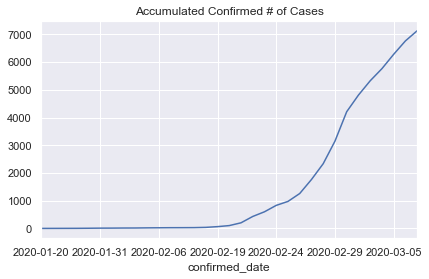

<Figure size 1008x1440 with 0 Axes>

In [30]:
daily_count = patient.groupby(patient.confirmed_date).id.count()
accumulated_count = daily_count.cumsum()
accumulated_count.plot()
plt.title('Accumulated Confirmed # of Cases')
plt.figure(figsize=(14,20))
sns.set_style("darkgrid")